In [1]:
!pip install -q datasets transformers
!pip install -qU accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 4.6 MB/s eta 0:00:00


In [6]:
import datasets
data = datasets.load_dataset(
    "jamescalam/image-text-demo",
    split="train",
    revision="180fdae")
data

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for jamescalam/image-text-demo contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/jamescalam/image-text-demo
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Dataset({
    features: ['text', 'image'],
    num_rows: 21
})

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('figure', figsize=(5, 5))

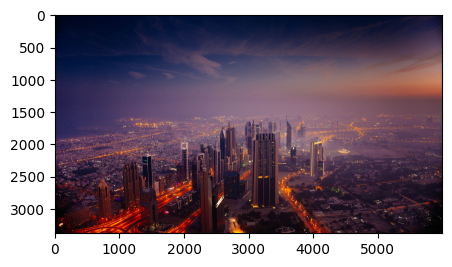

In [8]:
plt.imshow(data[0]['image']);

In [12]:
from torchvision import transforms
transt = transforms.ToTensor()
img = transt(data[2]['image'])
img.shape

torch.Size([3, 5184, 3456])

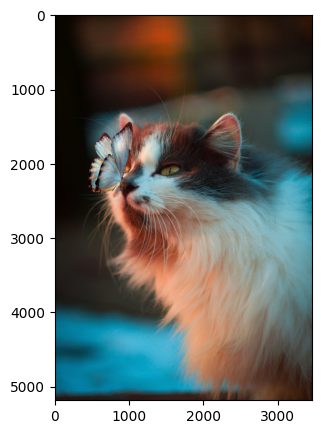

In [13]:
plt.imshow(img.permute(1, 2, 0));

In [14]:
patches = img.data.unfold(0, 3, 3)
patches.shape

torch.Size([1, 5184, 3456, 3])

In [15]:
patch = 256
patches = patches.unfold(1, patch, patch)
patches.shape

torch.Size([1, 20, 3456, 3, 256])

In [16]:
patches = patches.unfold(2, patch, patch)
patches.shape

torch.Size([1, 20, 13, 3, 256, 256])